In [1]:
# Basic Classification of clothing images 

# Import the necessary libraries

import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt



# Import the dataset MNIST

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape


(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
len(test_images)

10000

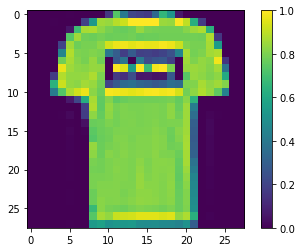

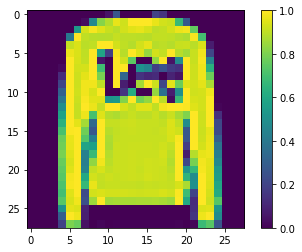

In [27]:
# Plotting the item image

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

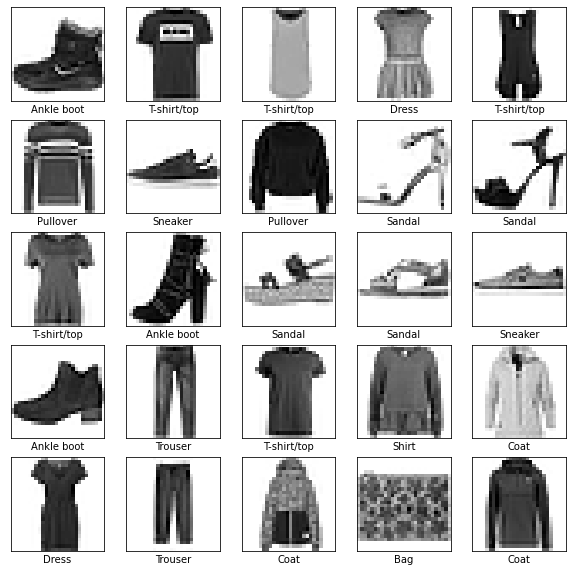

In [8]:
# Scaling the values in the range of 0-1 before feeding it to the neural network

train_images = train_images/255.0
test_images = test_images/255.0

#Verifying first 25 images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4977 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3371 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2686 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2572 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2492 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3494 - accuracy: 0.8755

Test accuracy: 0.8755000233650208


In [13]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

In [15]:
predictions[0]


array([2.3277071e-06, 2.7032018e-10, 1.4809626e-08, 1.0838870e-10,
       1.5632577e-07, 7.4532500e-04, 2.1807129e-07, 1.1788307e-03,
       1.5262945e-06, 9.9807161e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

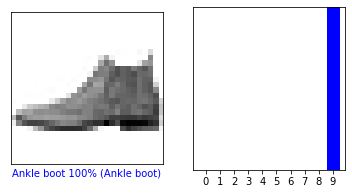

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


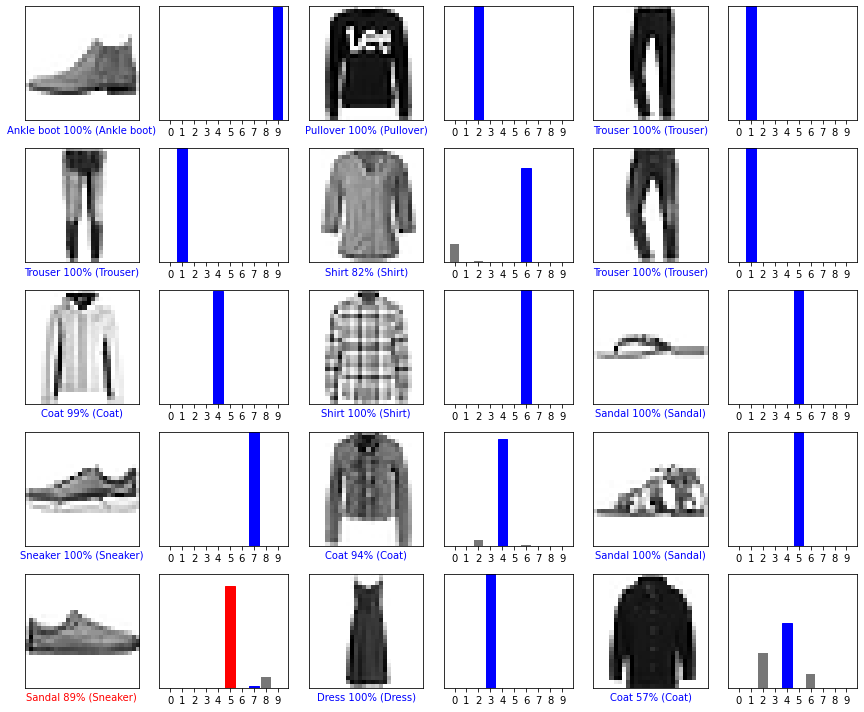

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.0809927e-06 5.6064348e-16 9.9981350e-01 1.6989018e-11 9.9093588e-05
  5.0681934e-11 8.2329585e-05 1.7935987e-17 3.5453165e-11 6.0871901e-16]]


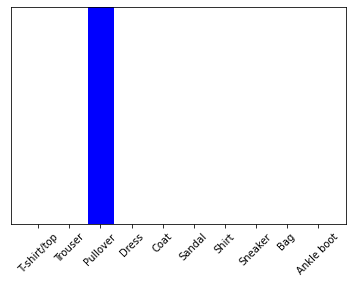

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [39]:
np.argmax(predictions_single[0])

6